# Проект: Анализ закономерностей определяющих успешность игр интернет-магазина «Стримчик»

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».  

**Задачи**  

- Изучить общую информацию
- Подготовить данные для анализа
- Провести исследовательский анализ данных
- Составить портрет пользователя каждого региона
- Проверить гипотезы
- Написать общий вывод

**Описание данных**  

- `Name` - название игры
- `Platform` - платформа
- `Year_of_Release` - год выпуска
- `Genre` - жанр игры
- `NA_sales` - продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` - продажи в Европе (миллионы проданных копий)
- `JP_sales` - продажи в Японии (миллионы проданных копий)
- `Other_sales` - продажи в других странах (миллионы проданных копий)
- `Critic_Score` - оценка критиков (максимум 100)
- `User_Score` - оценка пользователей (максимум 10)
- `Rating ` - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Шаг 1. Откроем файл с данными и изучим общую информацию**

Импортируем необходимые библиотеки

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')

Посмотрим данные в таблице

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим общую информацию о таблице

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим информацию о количественных значениях в таблице

In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод**  

В таблице 16 715 строк и 11 колонок.  
Данные представлены типами `float` и `object`. Необходимо будет изменить тип данных в столбце `Year_of_Release` на тип данных `int` и в столбце `User_Score` на тип данных `float`.  
Названия столбцов не стандартизированы и не приведены к нижнему регистру.  
В шести столбцах имеются пропущенные значения, далее определим их количество и заполним пропуски там, где это возможно.  
Самая первая игра была выпущена в 1980 году, квартили же показывают, что большая часть игр была выпущена в период с 2003 по 2010 год.  
По минимальным значения продаж можно судить о том, что были игры, которые вообще не продались.

**Шаг 2. Подготовим данные**

Приведем названия столбцов к нижнему регистру

In [6]:
data.columns = data.columns.str.lower()

Проверим изменения

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Посмотрим количество пропусков

In [8]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Всего по два пропуска в колонках name и genre - удалим эти строки

In [9]:
data = data.dropna(subset=['name', 'genre'])

Проверим результат

In [10]:
data.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Так же достаточно мало пропусков в столбце year_of_release, заполнять такие данные средним некорректно - это может отразиться на результатах. Посмотрим на процент пропусков в этой колонке

In [11]:
round(data.isnull().mean() * 100, 2)

name                0.00
platform            0.00
year_of_release     1.61
genre               0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.31
user_score         40.08
rating             40.47
dtype: float64

Так как количество пропусков составляет 1,6% от всех данных, то целесообразнее будет удалить строки с этими пропусками

In [12]:
data = data.dropna(subset=['year_of_release'])

Проверим результат

In [13]:
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

В столбцах `critic_score`, `user_score` и `rating` пропусков достаточно много. Так как такие данные заменить средним нельзя, то оставляем пропуски.

Посмотрим есть ли в датасете дубликаты

In [14]:
data.duplicated().sum()

0

Проверим наличие неявных дубликатов одновременно в столбцах `name`, `platform`, `year_of_release`

In [15]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [16]:
duplicates = data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)
duplicated_rows = data[duplicates]
duplicated_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Нашелся один дубликат, удалим его

In [17]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

Проверим результат

In [18]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

В столбце `Year_of_Release` заменим тип данных на целочисленный для удобства проведения рассчетов

In [19]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year_of_release'] = data['year_of_release'].dt.year

Проверим результат

In [20]:
display(data.head(1))
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Посмотрим на значения в столбце `user_score`

In [21]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.9       2
0.2       2
1.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

В столбце `user_score` встречаются значения, записанные как tbd - To Be Determined, т.е. еще не определенный пользователями рейтинг. Таких значений достаточно много - 2376, просто удалить их нельзя, так как это отразится на всем датасете, заменять их средними значениями, будет некорректно - т.к. могут исказиться результаты, поэтому заменим их на NaN.

In [22]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

Проверим результат

In [23]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Приведем столбец `user_score` к типу float

In [24]:
data['user_score'] = data['user_score'].astype('float64')

Проверим результат

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [26]:
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [27]:
data['total_sales'] = data['na_sales']+ data['eu_sales'] + data['jp_sales'] + data['other_sales']

Проверим результат

In [28]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Посмотрим на характеристики столбца `total_sales`

In [29]:
data['total_sales'].describe()

count    16443.000000
mean         0.536055
std          1.558828
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

**Вывод**  

Привели названия столбцов к нижнему регистру.  
Удалили пропуски в колонках `year_of_release`, `name` и `genre`, изменили в колонке `year_of_release` тип данных на целочисленный.  
В колонке `user_score` заменили `tbd` на `NaN`.      
Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец. Размер суммарных продаж составляет от 0 до 82,5 млн проданных копий.       
После обработки пропусков некоторых значений, в нашем датасете остались пропуски в столбцах `critic_score`, `user_score` и `rating`. Поскольку восстановить пропуски не предоставляется возможным, так как оценки зависят от многих факторов и могут кардинально отличаться, оставим эти пропуски как есть и будем продолжать анализ.

**Шаг 3. Проведем исследовательский анализ данных**

**Посмотрим сколько игр выпускалось в разные годы**

Сформируем сводную таблицу по количеству выпущенных игр за каждый год. Чтобы нагляднее оценить распределение, дополнительно выведем график распределения выпущенных игр по годам.

In [30]:
data_group_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
data_group_year.head()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


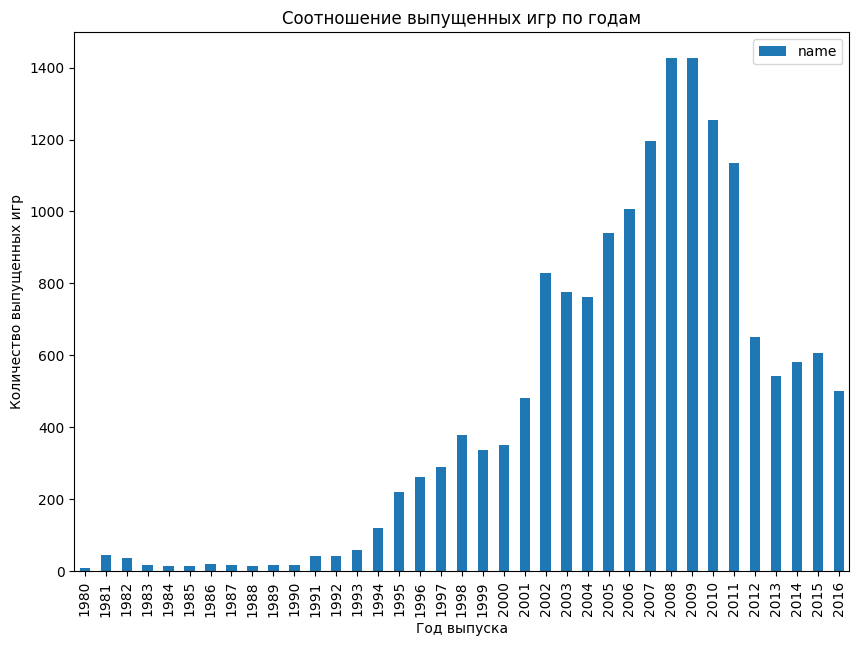

In [31]:
data_group_year.plot(
    kind = 'bar',
    figsize = (10,7),
    title = 'Соотношение выпущенных игр по годам',
    xlabel = 'Год выпуска',
    ylabel = 'Количество выпущенных игр'
);

Из графика видно, что количество выпущенных игр, начало набирать популярность начиная с 1990-х. Заметный рост начинается примерно с 1995г, пик выпуска игр приходится на 2008г, затем начиная с 2011г количество выпущенных игр идет резко на спад и к 2016 году количество выпущенных игр, становится более чем в 2 раза меньше, по сравнению с 2008 годом. По этой причине было бы некорректно при последующем анализе и прогнозировании продаж на последующие периоды использовать данные за ранние годы.

**Посмотрим как менялись продажи по платформам**

Выведем платформы с наибольшими суммарными продажами

In [32]:
data_sales_year = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
data_sales_year = data_sales_year.sort_values(by='total_sales', ascending=False)
data_sales_year.head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Построим график для наглядности

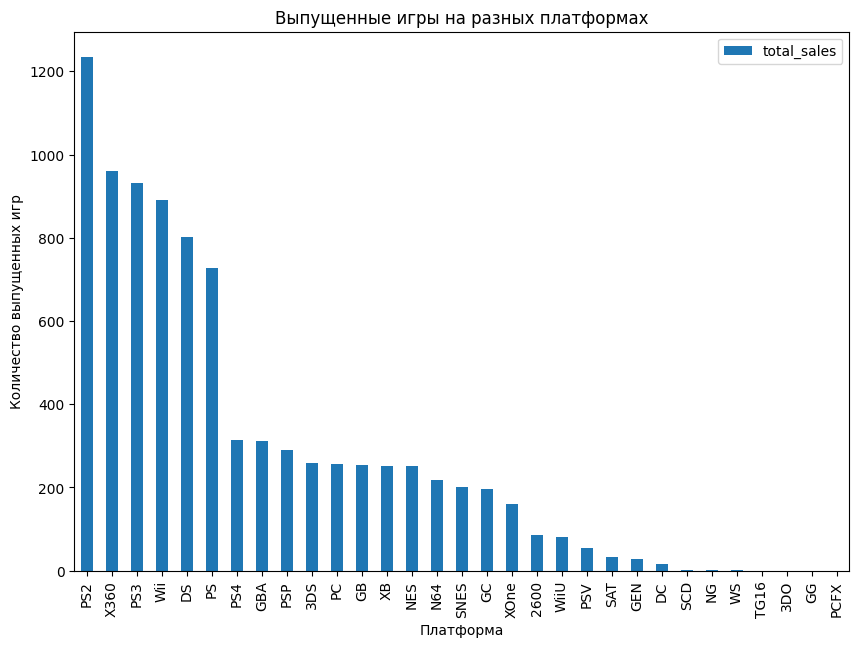

In [33]:
data_sales_year.plot(
    kind = 'bar',
    figsize = (10,7),
    title = 'Выпущенные игры на разных платформах',
    xlabel = 'Платформа',
    ylabel = 'Количество выпущенных игр'
);

Платформы `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`, самые популярные, с наибольшими суммарными продажами. Выделим эти платформы и построим для них график с распределением продаж по годам

In [34]:
top_platforms = data_sales_year.loc[data_sales_year['total_sales'] > 600]
top_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58


Сформируем сводную таблицу и выведем график с распределением продаж по годам

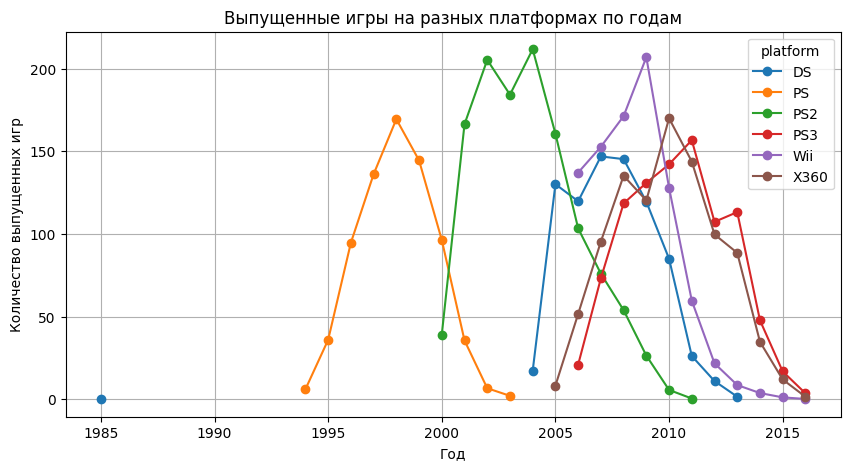

In [35]:
pd.pivot_table(
    data.query('platform in @top_platforms.index'),
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
    .plot(grid=True, style='o-', figsize=(10,5), 
    title = 'Выпущенные игры на разных платформах по годам',
    xlabel = 'Год',
    ylabel = 'Количество выпущенных игр');

По проведенному нами анализу мы обнаружили, что в среднем игры на одной платформе выпускались 10-12 лет, однако срок, за который они развиваются, это примерно 3-4 года, поэтому в качестве актуального периода для дальнейшего анализа установим следующий период, с 2012 по 2016 год, и отсортируем значения в таблице в соответствии с этим периодом.

**Определим актуальный период для анализа данных**

Сделаем выборку за рассматриваемый период

In [36]:
games_new_period = data.loc[data['year_of_release'] > 2011]
games_new_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Посмотрим какие платформы лидируют по продажам

Сформируем сводную таблицу за рассматриваемый период времени для каждой платформы

In [37]:
platforms_new_period = games_new_period.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platforms_new_period = platforms_new_period.sort_values(by='total_sales', ascending=False)
platforms_new_period

,total_sales
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Выведем график для наглядности

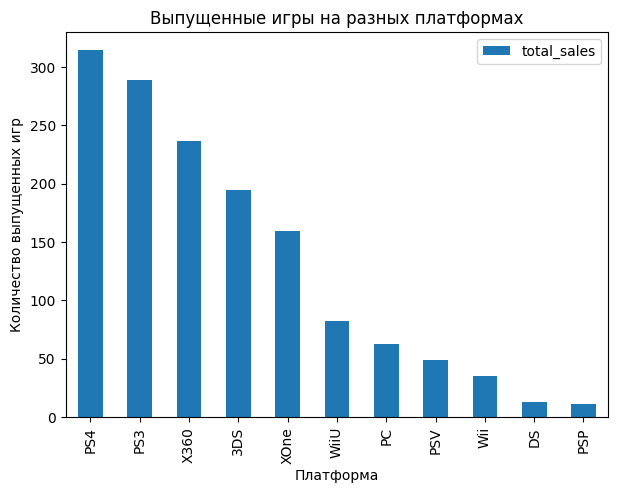

In [38]:
platforms_new_period.plot(
    kind = 'bar',
    figsize = (7,5),
    title = 'Выпущенные игры на разных платформах',
    xlabel = 'Платформа',
    ylabel = 'Количество выпущенных игр'
);

В соответствии с даннами актуального периода по продажам лидируют платформы `PS4`, `PS3`, `X360`, `3DS` и `XOne`

Посмотрим на распределение данных актуальных платформ по годам

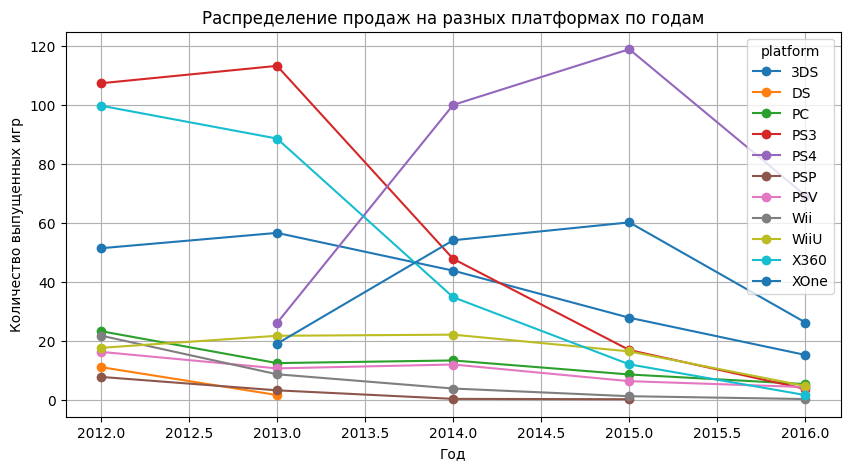

In [39]:
pd.pivot_table(
    data.query('platform in @platforms_new_period.index and year_of_release > 2011'),
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
    .plot(grid=True, style='o-', figsize=(10,5), 
    title = 'Распределение продаж на разных платформах по годам',
    xlabel = 'Год',
    ylabel = 'Количество выпущенных игр');

Исходя из графиков можно сделать следующие выводы:

Продажы платформы `DS` не актуальны с 2013 г, `PSP` с 2015 г.

Продажи платформ `PS`, `PS3`, `PSV`, `Wii`, `WiiU`, `X360 `идут на спад и в итоге перестанут пользоваться спросом.

Продажи платформ `3DS`, `PS4` и `XOne` падают, но скорее всего они еще будут актуальны в ближайшее время, основываясь на средней продолжности жизнеспособности платформ.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

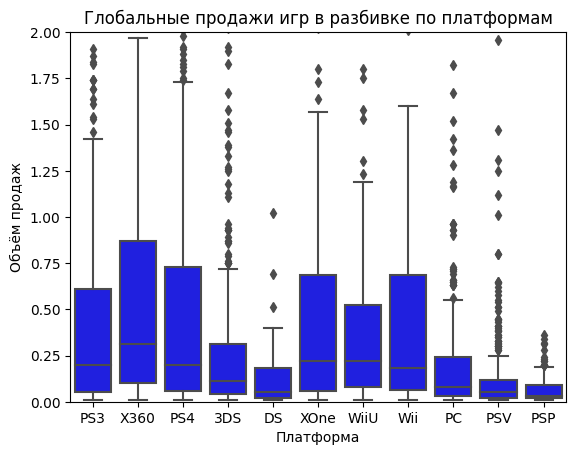

In [40]:
sns.boxplot(data=games_new_period, y="total_sales", x="platform", color='blue')
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Объём продаж')
plt.ylim(top=2, bottom=0)
plt.show();

В целом, по анализируемому нами периоду, платформы зарабатывали небольшие средства от продажи отдельных игр – большая часть значений находится от 0 до 0.75, с медианой не превышающей 0.5 млн копий. По объемам продаж лидируют платформы: `X360`, `PS3`, `PS4`, `XOne`, `Wii`, `WiiU`.

Большую часть выручки им приносят отдельные игры, которые пользуется большой популярностью – практически у всех платформ есть несколько выбросов, принёсших большую часть средств. Отсюда можно объяснить падение популярности отдельных платформ – по большей части они держатся на плаву за счёт отдельных игр, а не регулярной деятельности.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

Возьмем для анализа платформы `PS4`, `X360` и `PS3` 

**Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для платформы PS4**

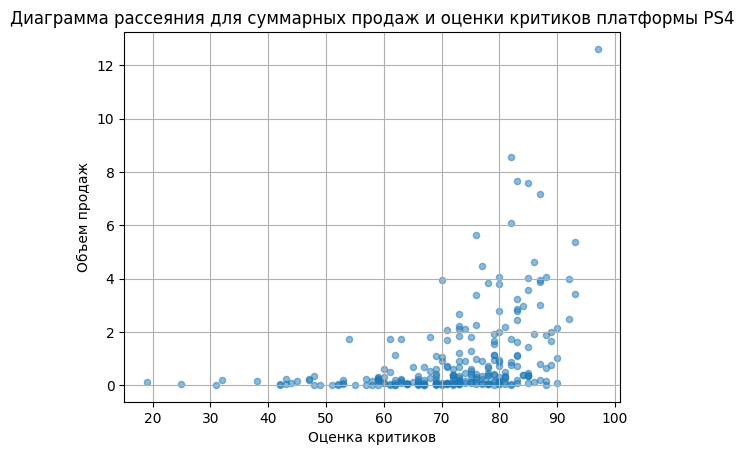

Коэфициент корреляции продаж и оценки критиков: 0.41


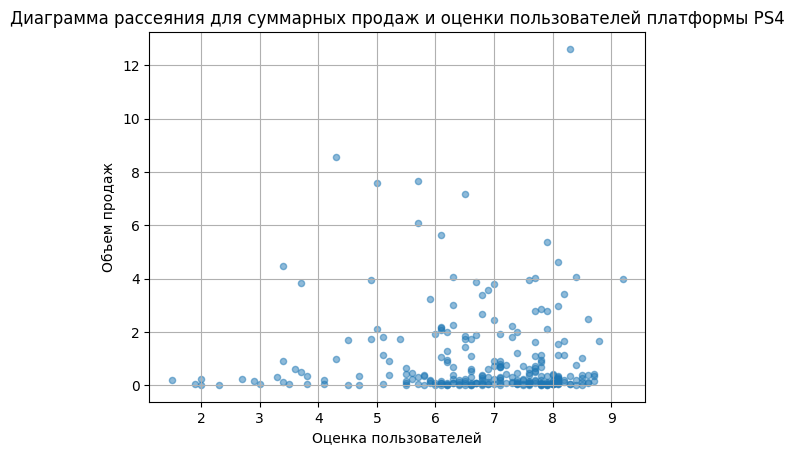

Коэфициент корреляции продаж и оценки пользователей: -0.03


In [41]:
platform_ps4 = games_new_period.loc[games_new_period['platform'] == 'PS4']
platform_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, grid = True)
plt.title('Диаграмма рассеяния для суммарных продаж и оценки критиков платформы PS4')
plt.xlabel('Оценка критиков'),
plt.ylabel('Объем продаж'),
plt.show()
print('Коэфициент корреляции продаж и оценки критиков:', "{:.2f}".format(platform_ps4['critic_score']\
                                                                         .corr(platform_ps4['total_sales'])))

platform_ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, grid = True)
plt.title('Диаграмма рассеяния для суммарных продаж и оценки пользователей платформы PS4')
plt.xlabel('Оценка пользователей'),
plt.ylabel('Объем продаж'),
plt.show()
print('Коэфициент корреляции продаж и оценки пользователей:', "{:.2f}".format(platform_ps4['user_score'].\
                                                                              corr(platform_ps4['total_sales'])))

**Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для платформы X360**

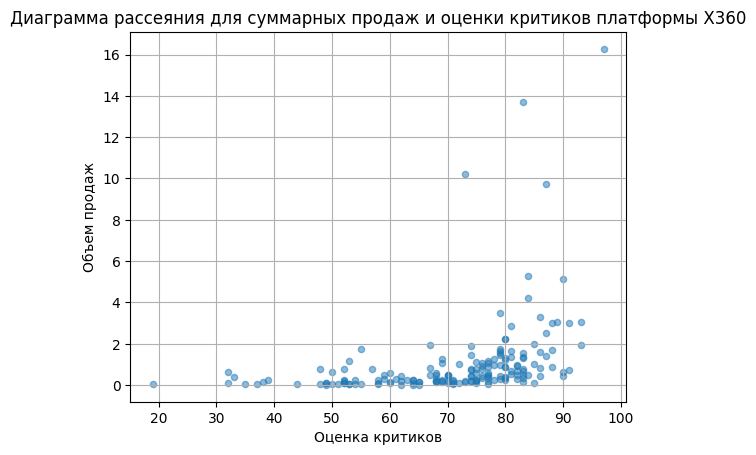

Коэфициент корреляции продаж и оценки критиков: 0.36


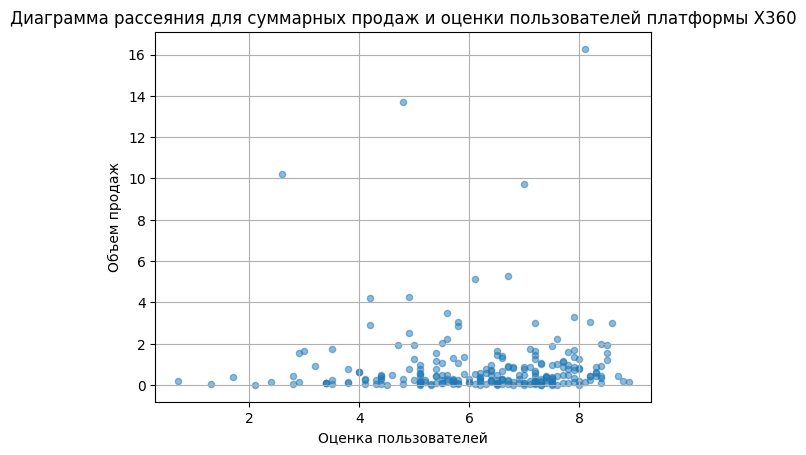

Коэфициент корреляции продаж и оценки пользователей: 0.01


In [42]:
platform_X360 = games_new_period.loc[games_new_period['platform'] == 'X360']
platform_X360.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, grid = True)
plt.title('Диаграмма рассеяния для суммарных продаж и оценки критиков платформы X360')
plt.xlabel('Оценка критиков'),
plt.ylabel('Объем продаж'),
plt.show()
print('Коэфициент корреляции продаж и оценки критиков:', "{:.2f}".format(platform_X360['critic_score']\
                                                                         .corr(platform_X360['total_sales'])))

platform_X360.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, grid = True)
plt.title('Диаграмма рассеяния для суммарных продаж и оценки пользователей платформы X360')
plt.xlabel('Оценка пользователей'),
plt.ylabel('Объем продаж'),
plt.show()
print('Коэфициент корреляции продаж и оценки пользователей:', "{:.2f}".format(platform_X360['user_score']\
                                                                              .corr(platform_X360['total_sales'])))

**Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для платформы PS3**

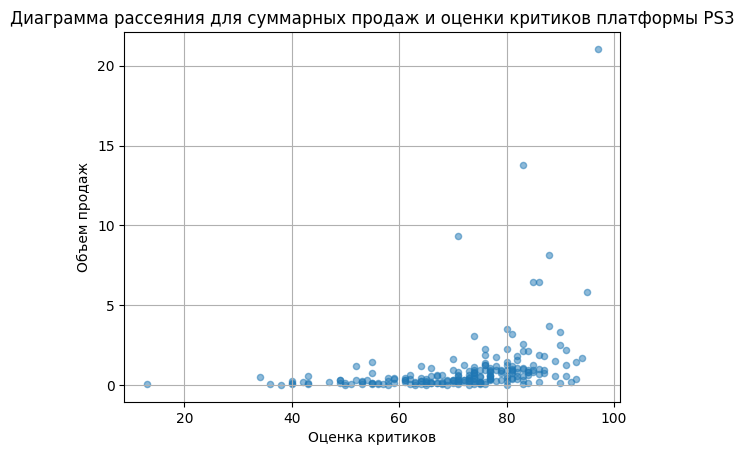

Коэфициент корреляции продаж и оценки критиков: 0.33


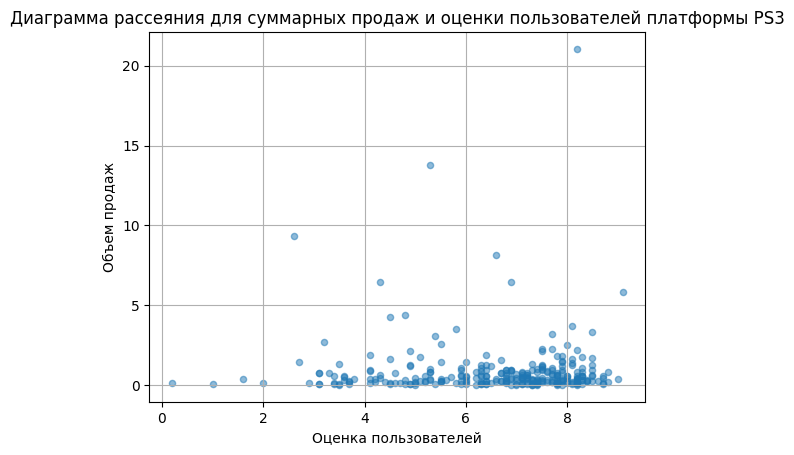

Коэфициент корреляции продаж и оценки пользователей: -0.01


In [43]:
platform_PS3 = games_new_period.loc[games_new_period['platform'] == 'PS3']
platform_PS3.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, grid = True)
plt.title('Диаграмма рассеяния для суммарных продаж и оценки критиков платформы PS3')
plt.xlabel('Оценка критиков'),
plt.ylabel('Объем продаж'),
plt.show()
print('Коэфициент корреляции продаж и оценки критиков:', "{:.2f}".format(platform_PS3['critic_score']\
                                                                         .corr(platform_PS3['total_sales'])))

platform_PS3.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, grid = True)
plt.title('Диаграмма рассеяния для суммарных продаж и оценки пользователей платформы PS3')
plt.xlabel('Оценка пользователей'),
plt.ylabel('Объем продаж'),
plt.show()
print('Коэфициент корреляции продаж и оценки пользователей:', "{:.2f}".format(platform_PS3['user_score']\
                                                                              .corr(platform_PS3['total_sales'])))

Обернем в функцию повторяющийся код

In [44]:
def score_critical_and_user(games_new_period, platform, score_type):
    platform_data = games_new_period.loc[games_new_period['platform'] == platform]
    if score_type == 'critic':
        label = 'оценки критиков'
        score = 'critic_score'
    else:
        label = 'оценки пользователей'
        score = 'user_score'
    platform_data.plot(x=score, y='total_sales', kind='scatter', alpha=0.5, grid=True)
    plt.title('Диаграмма рассеяния суммарных продаж и ' + label + ' платформы ' + platform)
    plt.xlabel(label)
    plt.ylabel('Объем продаж')
    plt.show()
    print('Коэфициент корреляции продаж и ' + label + ' для платформы ' + platform + ':', "{:.2f}".format(platform_data[score]\
                                                                             .corr(platform_data['total_sales'])))

Вызовем функцию с интересующими нас значениями

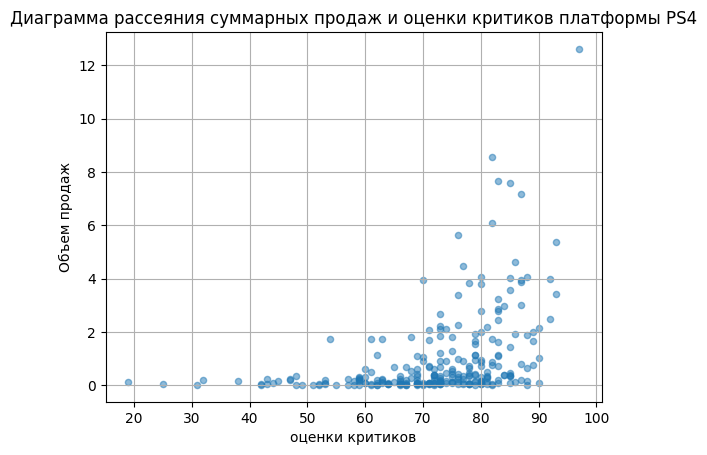

Коэфициент корреляции продаж и оценки критиков для платформы PS4: 0.41


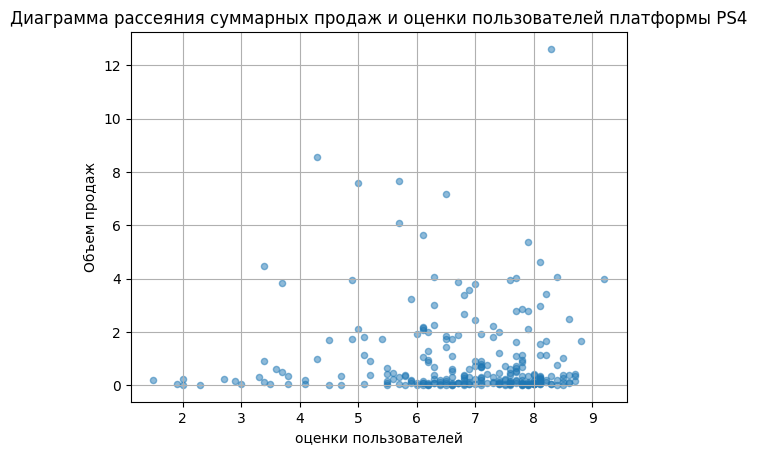

Коэфициент корреляции продаж и оценки пользователей для платформы PS4: -0.03


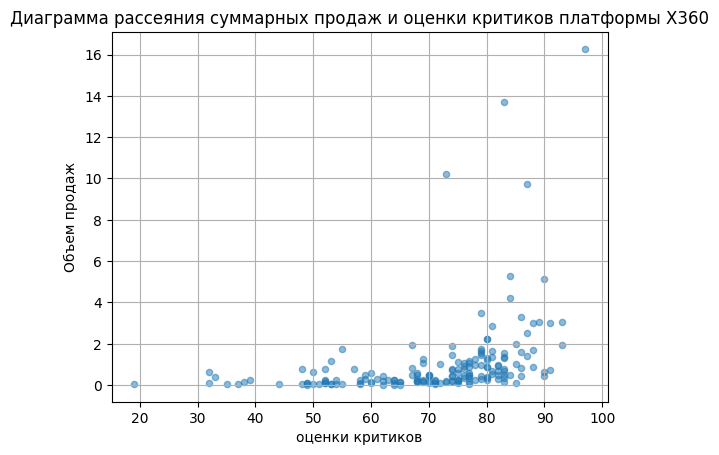

Коэфициент корреляции продаж и оценки критиков для платформы X360: 0.36


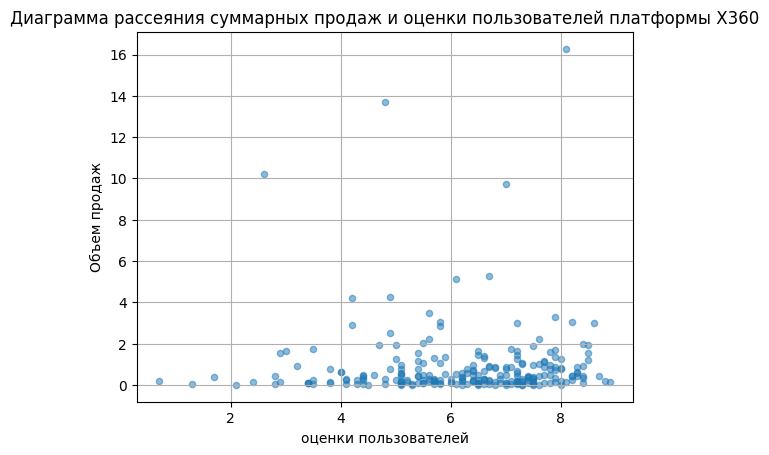

Коэфициент корреляции продаж и оценки пользователей для платформы X360: 0.01


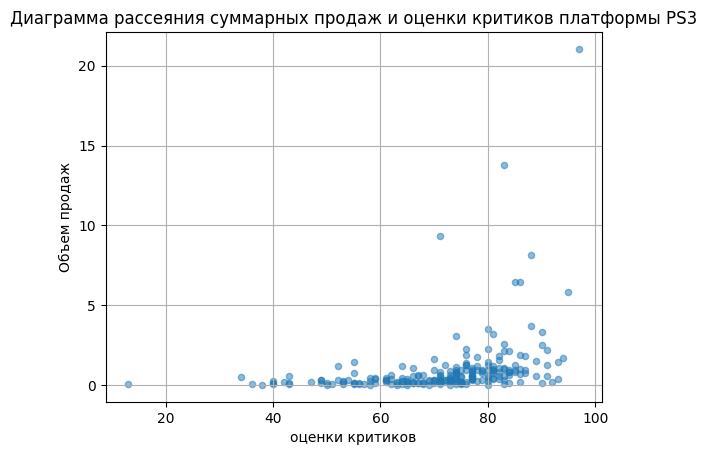

Коэфициент корреляции продаж и оценки критиков для платформы PS3: 0.33


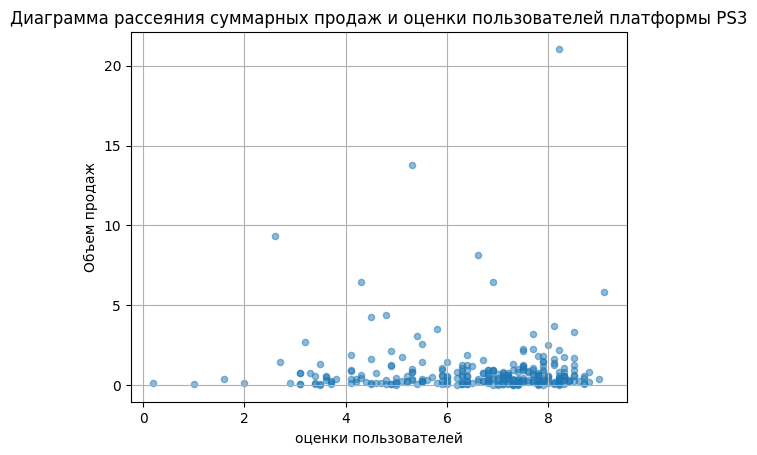

Коэфициент корреляции продаж и оценки пользователей для платформы PS3: -0.01


In [45]:
score_critical_and_user(games_new_period, 'PS4', 'critic')
score_critical_and_user(games_new_period, 'PS4', 'user')
score_critical_and_user(games_new_period, 'X360', 'critic')
score_critical_and_user(games_new_period, 'X360', 'user')
score_critical_and_user(games_new_period, 'PS3', 'critic')
score_critical_and_user(games_new_period, 'PS3', 'user')

**Вывод**  

По диаграммам связи продаж и оценками критиков видна положительная взаимосвязь, объемы продаж растут с увеличением оценки критиков, но связь нельзя назвать сильной.  

По диаграммам связи продаж и оценками пользователей связь отстуствует, что можно объяснить тем, что пользовательские оценки могут быть достаточно субъективными по сравнению с оценками критиков.

**Посмотрим как влияют на продажи внутри остальных платформ отзывы пользователей и критиков.**

Выделим топовые платформы

In [46]:
platforms_second = platforms_new_period.loc[platforms_new_period['total_sales'] > 200]
platforms_second.sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,288.78
X360,236.54


Сделаем выборку всех остальных платформ, за исключением топовых и построим графики

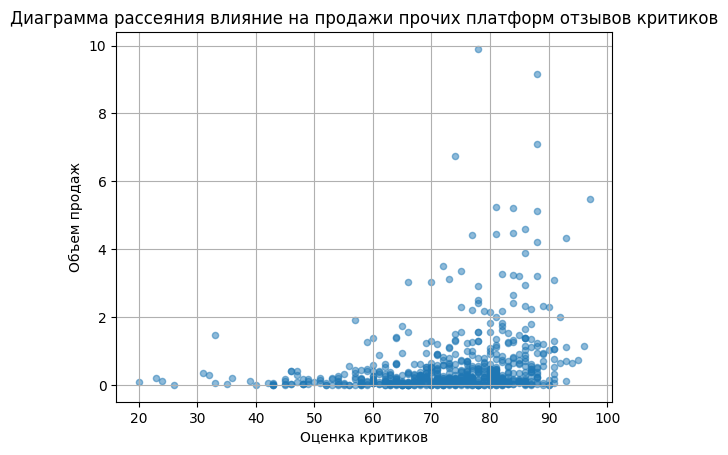

Коэфициент корреляции продаж прочих платформ и оценки критиков: 0.27


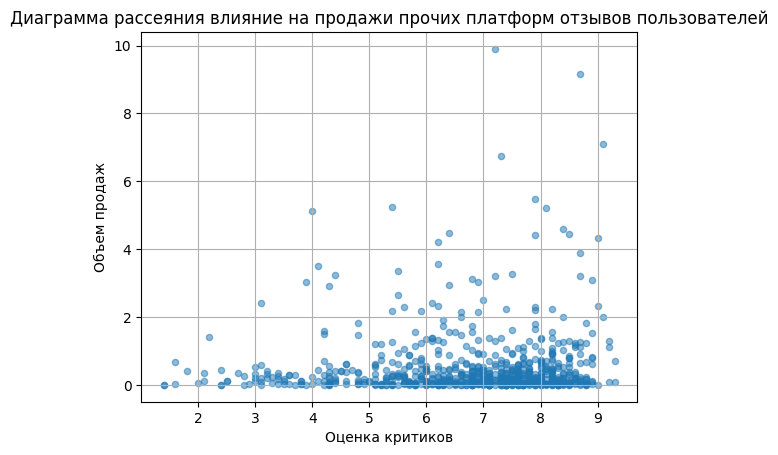

Коэфициент корреляции продаж прочих платформ и оценки пользователей: 0.06


In [47]:
other_games = games_new_period.query('platform not in @platforms_second.index')
other_games.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, grid = True)
plt.title('Диаграмма рассеяния влияние на продажи прочих платформ отзывов критиков')
plt.xlabel('Оценка критиков'),
plt.ylabel('Объем продаж'),
plt.show()
print('Коэфициент корреляции продаж прочих платформ и оценки критиков:', "{:.2f}".format(other_games['critic_score']\
                                                                                         .corr(other_games['total_sales'])))

other_games.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, grid = True)
plt.title('Диаграмма рассеяния влияние на продажи прочих платформ отзывов пользователей')
plt.xlabel('Оценка критиков'),
plt.ylabel('Объем продаж'),
plt.show()
print('Коэфициент корреляции продаж прочих платформ и оценки пользователей:', "{:.2f}".format(other_games['user_score']\
                                                                                              .corr(other_games['total_sales'])))

**Вывод**  

По результатам графиков можно сделать вывод, что для большинства платформ действительно прослеживается неболшая корреляция оценок критиков и продаж. Однако оценки пользователей практически не влияют на продажи.

**Посмотрим на общее распределение игр по жанрам**

Выведем сводную таблицу с информацией о суммарных продажах игр, их количестве для каждого жанра, медиану и среднее продажи игр.

In [48]:
genre_games = games_new_period.pivot_table(index='genre', values='total_sales', aggfunc=('sum', 'median', 'count', 'mean'))
round(genre_games.sort_values(by='sum', ascending=False), 2)

,count,mean,median,sum
genre,,,,
Action,1031,0.43,0.12,441.12
Shooter,235,1.30,0.44,304.73
Role-Playing,370,0.52,0.14,192.80
Sports,267,0.68,0.24,181.06
Misc,192,0.44,0.12,85.04
Platform,85,0.72,0.21,61.00
Racing,115,0.47,0.14,53.50
Fighting,109,0.41,0.13,44.49
Simulation,80,0.44,0.12,35.12


Выведем график распределения суммарных продаж по жанрам

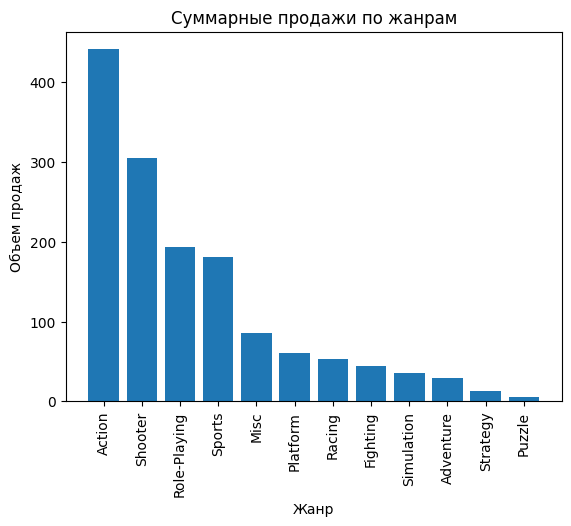

In [49]:
genre_sales = games_new_period.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
plt.bar(genre_sales.index, genre_sales.values)
plt.title('Суммарные продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж')
plt.xticks(rotation=90)
plt.show()

**Вывод**  

Самые прибыльные жанры игр это - `Action`, `Shooter`, `Role-Playing`. Наименее прибыльные жанры `Adventure`, `Strategy`, `Puzzle`.    
Больше всего выпускается игр жанра `Action`, `Role-Playing`, `Adventure`. Меньше всего выпускается игр жанров `Simulation`, `Strategy`, `Puzzle`.  
Если же рассматривать медианные значения продаж, то в топ-3 попали такие жанры, как `Shooter`, `Sports`, `Platform`.  

Средние и медианные значения продаж очень сильно отличаются - медиана везде намного меньше среднего значения, что говорит о том, что большая часть приносимой платформам выручки получается от очень популярных игр, являющимися выбросами.  

По продажам на одну игру медианному и среднему значению, мы можем сделать вывод о том, что игры жанра `Shooter` приносят больше выручки, чем остальные жанры.

**Шаг 4. Составим портрет пользователя каждого региона**

Определим портрет пользователя для каждого региона (NA, EU, JP):  

- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе

Создадим цикл в котором выведем топ-5 самых популярных платформ и жанров по каждому региону

In [50]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

print('ТОП-5 популярных платформ в каждом регионе:''\n')

for region in regions:
    display(games_new_period.pivot_table(index='platform', values=region, aggfunc='sum')\
            .sort_values(by=region, ascending=False).head(5))

print('ТОП-5 популярных жанров в каждом регионе:''\n')

for region in regions:
    display(games_new_period.pivot_table(index='genre', values=region, aggfunc='sum')\
            .sort_values(by=region, ascending=False).head(5))

ТОП-5 популярных платформ в каждом регионе:



,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


,eu_sales
platform,
PS4,141.09
PS3,106.85
X360,74.52
XOne,51.59
3DS,42.64


,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


ТОП-5 популярных жанров в каждом регионе:



,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.08
Role-Playing,48.53
Racing,27.29


,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


Получаем рейтинг платформ для каждого региона:  

- Северная Америка: X360, PS4, PS3, XOne, 3DS
- Европа: PS4, PS3, X360, XOne, 3DS
- Япония: 3DS, PS3, PSV, PS4, WiiU.  

Видно, что общий портрет продаж игр по платформам в Северной Америке и Европе, достаточно похож: в топ-5 вошёл одинаковый набор платформ. Единственное отличие в первом месте: для Северной Америки это `Х360`, для Европы – `PS4`,

Портрет продаж игр по платформам в Японии отличается от предыдущих регионов. В Японии также в топе присутствуют платформы `PSV` и `WiiU`, самой популярной выступает платформа `3DS`, которая в Европе и Северной Америке заняла лишь 5 место.  

Общий портрет продаж игр по жанрам в Северной Америке и Европе достаточно похож, в топ-4 вошёл одинаковый набор платформ. Единственное отличие в 5-ом месте, в Северной Америке на 5-ом месте жанр `Misc`, а в Европе жанр `Racing`.

Портрет игр по жанрам в Японии отличается от предыдущих регионов. В Японии самые топовые жанры `Role-Playing` и `Action`, менее популярные `Misc`, `Simulation`, `Fighting`.

Выведем таблицы и визуализируем самые популярные платформы и жанры в регионах


Самые популярные платформы в регионах

ТОП-5 популярных платформ в регионе na_sales:


,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


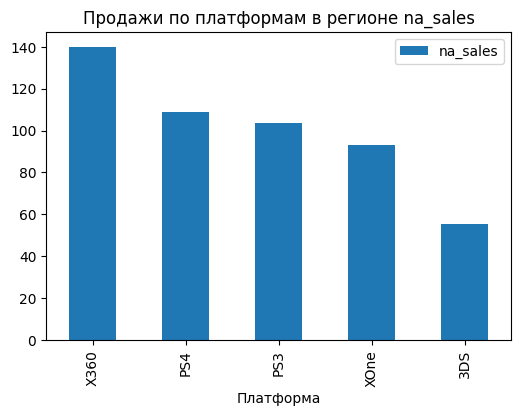


ТОП-5 популярных платформ в регионе eu_sales:


,eu_sales
platform,
PS4,141.09
PS3,106.85
X360,74.52
XOne,51.59
3DS,42.64


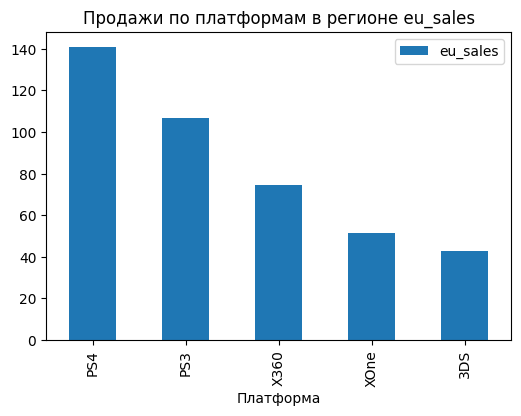


ТОП-5 популярных платформ в регионе jp_sales:


,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


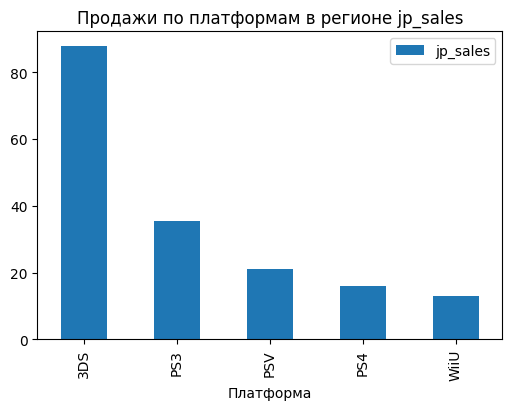


Самые популярные жанры в регионах

ТОП-5 популярных жанров в регионе na_sales:


,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


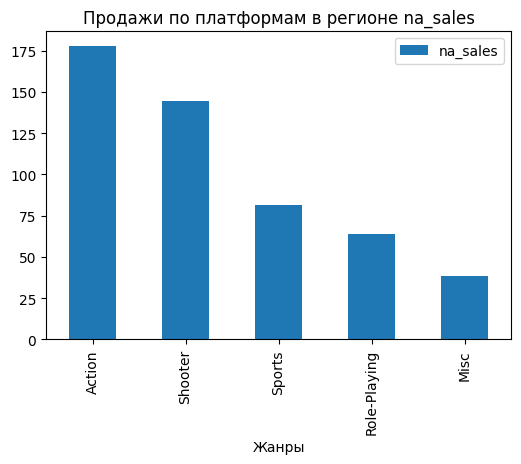


ТОП-5 популярных жанров в регионе eu_sales:


,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.08
Role-Playing,48.53
Racing,27.29


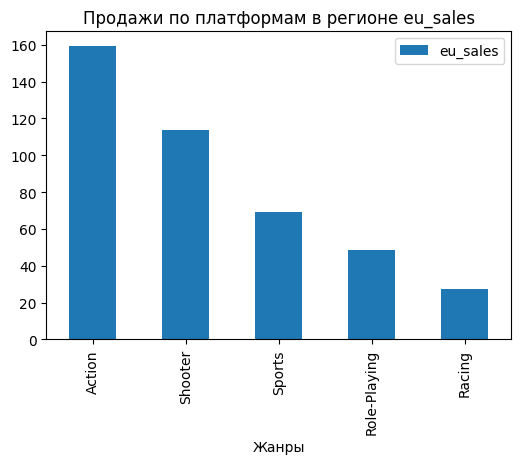


ТОП-5 популярных жанров в регионе jp_sales:


,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


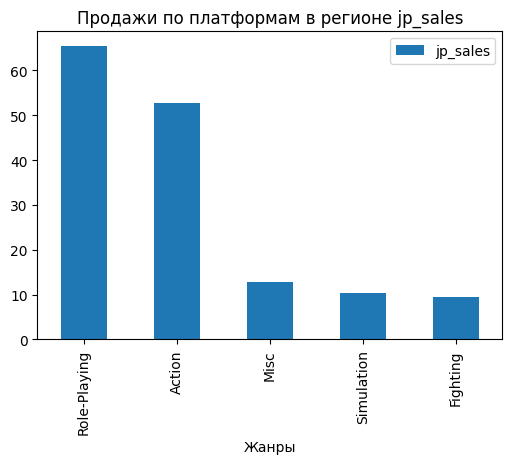

In [51]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

print('\n''\033[1mСамые популярные платформы в регионах\033[0m')

for region in regions:
    print('\n'f'ТОП-5 популярных платформ в регионе {region}:')
    platform_top5 = games_new_period.pivot_table(index='platform', values=region, aggfunc='sum')\
    .sort_values(by=region, ascending=False).head(5)
    display(platform_top5)
    platform_top5.plot(
    kind = 'bar',
    figsize = (6,4),
    title = f'Продажи по платформам в регионе {region}',
    xlabel = 'Платформа')
    plt.show()


print('\n''\033[1mСамые популярные жанры в регионах\033[0m')

for region in regions:
    print('\n'f'ТОП-5 популярных жанров в регионе {region}:')
    genre_top5 = games_new_period.pivot_table(index='genre', values=region, aggfunc='sum')\
    .sort_values(by=region, ascending=False).head(5)
    display(genre_top5)
    genre_top5.plot(
    kind = 'bar',
    figsize = (6,4),
    title = f'Продажи по платформам в регионе {region}',
    xlabel = 'Жанры')
    plt.show()

**Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе**

Создадим цикл, в котором выведем данные и визуализируем информацию


Рейтинг ESRB для региона na_sales:


,na_sales
rating,
M,231.57
E,114.37
E10+,75.70
T,66.02


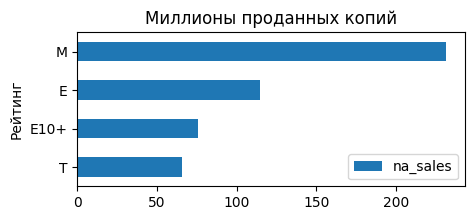


Рейтинг ESRB для региона eu_sales:


,eu_sales
rating,
M,193.96
E,113.02
E10+,55.37
T,52.96


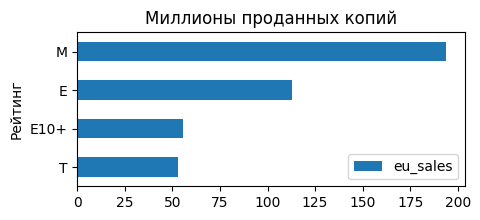


Рейтинг ESRB для региона jp_sales:


,jp_sales
rating,
E,28.33
T,26.02
M,21.20
E10+,8.19


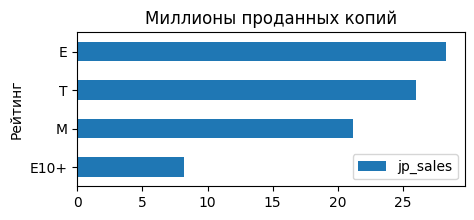

In [52]:
for region in regions:
    print('\n'f'Рейтинг ESRB для региона {region}:')
    region_esrb = games_new_period.pivot_table(index='rating', values=region, aggfunc='sum').sort_values(by=region).head(5)
    display(games_new_period.pivot_table(index='rating', values=region, aggfunc='sum')\
            .sort_values(by=region, ascending=False).head(5))
    region_esrb.plot(
    kind = 'barh',
    figsize = (5,2),
    title = 'Миллионы проданных копий',
    xlabel = 'Рейтинг')
    plt.show()

**Вывод**  

В Северной Америке и Европе рейтинги оказались близкими друг к другу. Первые места заняли игры категории `М` ("Mature" - от 17 лет), затем `E` ("Everyone" - для всех), `Е10+` ("Everyone 10 and older" - от 10 лет) и `Т` ("Teen" - от 13 лет). 

Для Японии же рейтинг `М` оказался только на 3 месте, первое место занял рейтинг `E`, затем `T`, `М` и `Е10+`.

Если рассматривать вопрос о том, влияет ли рейтинг `ESRB` на продажи в каждом регионе, можно сказать, что он наибольшим образом влияет на игры, продаваемые в Северной Америке и Европе.

**Шаг 5. Проверим гипотезы**

Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы

Н0: Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые  
Н1: Средний пользовательские рейтинг платформы `Xbox One` отличается от среднего пользовательского рейтинга платформы `PC`

In [53]:
games_user_score = games_new_period.dropna(subset=['user_score'])

In [54]:
alpha = 0.05

results = st.ttest_ind(games_user_score[games_user_score['platform'] == 'XOne']['user_score'], 
                       games_user_score[games_user_score['platform'] == 'PC']['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 0.5535080500643661
Нет оснований отвергнуть нулевую гипотезу


По результатам теста мы не можем отвергнуть нулевую гипотезу о равенстве, следовательно, средние пользовательские рейтинги платформ `Xbox One` и `PC` с большей долей вероятности не имеют статистически значимых отличий

Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

Н0: Средние пользовательские рейтинги жанров `Action` и `Sports` одинаковые  
Н1: Средние пользовательские рейтинги жанров `Action` и `Sports` разные

In [55]:
alpha = 0.05

results = st.ttest_ind(games_user_score[games_user_score['genre'] == 'Action']['user_score'], 
                       games_user_score[games_user_score['genre'] == 'Sports']['user_score'])

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


По результатам теста мы можем отвергнуть нулевую гипотезу о равенстве и сказать о том, что с большой долей вероятности средние пользовательские рейтинги жанров `Action` и `Sports` имеют статистически значимые отличия. Проверим, больше или меньше

In [56]:
alpha = 0.05

results = st.ttest_ind(games_user_score[games_user_score['genre'] == 'Action']['user_score'], 
                       games_user_score[games_user_score['genre'] == 'Sports']['user_score'], alternative='greater')

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 2.4022616902314588e-26
Отвергаем нулевую гипотезу


По результатам теста мы выяснили, что средний пользовательский рейтинг жанра `Action` с большей вероятностью больше, чем средний пользовательский рейтинг жанра `Sports`

**Вывод**  

По результатам теста первой гипотезы мы выяснили, что мы не можем отвергнуть нулевую гипотезу о равенстве, следовательно, средние пользовательские рейтинги платформ `Xbox One` и `PC` с большей вероятностью одинаковые.  
По результатам теста второй гипотезы мы выяснили, что средний пользовательский рейтинг жанра `Action` с большей вероятностью больше, чем средний пользовательский рейтинг жанра `Sports`

**Шаг 6. Общий вывод**

Мы проанализировали данные и проверили некоторые гипотезы, которые могут помочь бизнесу вырасти и решить, на какой потенциально популярный продукт делать ставку, чтобы спланировать рекламные кампании.  

Основываясь на данных полученных из датасета, содержащих детальную информацию о каждой игре, ее жанра, платформе, годе выпуска, рейтинга и продажах, мы предприняли следующие шаги:  

Провели исследовательский анализ данных, чтобы определить сколько игр выпускалось в разные годы, определили актуальный период для анализа, нашли самые популярные платформы и их продажи за актуальный период.  
Определили, какие платформы и жанры пользовались популярностью и игры каких категорий продавались больше всего.  
Выяснили, есть ли корреляция между оценками пользователей, критиков и продаваемостью игр.  
Определили разницу в продаваемости игр по платформам, жанрам и рейтингам у пользователей трёх регионов: Северной Америки, Европы и Японии, а так-же какую долю от общих продаж они составляют.  
Вывели гипотезы и протестировали их, чтобы ответить на следующие поставленные вопросы:   
- отличаются ли средние пользовательские рейтинги платформ `Xbox One` и `PC`   
- отличаются ли средние пользовательские рейтинги `Action` и `Sports`.  

**Проанализировав данные, можно сделать следующие выводы:**  

Видеоигры стали набирать популярность с 1990-го года, но больше всего игр было продано в диапазоне с 2005 по 2011 год, после чего продаваемость видеоигр пошла на спад.  
Платформы `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS` стали самыми популярными с наибольшими суммарными продажами. Наибольшую популярность имеет платформа `PS2`.  
Средняя продолжительность жизнеспособности игровой платформы – 10-12 лет. Средняя продолжительность популярности платформы – 3-4 года.  
Среди игр в актуальном периоде (установленный нами с 2012 г по 2016 г) самыми популярными платформами стали `PS4`, `PS3`, `X360`, `3DS` и `XOne`.   
Большую часть выручки платформам приносят лишь отдельные игры, которые пользуется большей популярностью.  
Прослеживается, что оценка критиков влияет на продаваемость игр, тогда как оценка пользователей не влияет.  
Топ-5 самых продаваемых жанров игр следующий: `Action`, `Shooter`, `Role-playing`, `Sports` и `Misc`. Однако в среднем, отдельно взятая игра жанра `Shooter` приносит больше дохода.  

Портрет пользователя Северной Америки, определяющий успех: игры жанра `Action` на платформе `X360` рейтинга `М`.  

Портрет пользователя Европы, определяющий успех: игры жанра `Action` на платформе `PS4` рейтинга `M`.      

Портрет пользователя Японии, определяющий успех: игры жанра `Role-playing` на платформе `3DS` рейтинга `E`.  

По итогам проверки гипотез мы выяснили:  
Средний пользовательский рейтинг платформы `Xbox One` с большей вероятностью равен среднему пользовательскому рейтинга платформы `PC`.  
Средние пользовательские рейтинги жанров `Action` и `Sports` разные – средний пользовательский рейтинг жанра `Action` больше, чем средний пользовательский рейтинг жанра `Sports`.  

**Подводя итог, можно выделить основные характеристики потенциально успешного продукта:**

- для **Северной Америки**: игры жанра `Action`, `Shooter` с рейтингом `М`, выпускаемые для игровых консолей `X360`, `PS4`.

- для **Европы**: игры жанра `Action`, `Shooter` с рейтингом `М`, выпускаемые для игровых консолей `PS4`, `PS3`.

- для **Японии**: игры жанра `Action`, `Role-playing` с рейтингом `Е`, выпускаемые для игровых консолей `3DS`, `PS3`.

Интернет-магазину «Стримчик» стоит обратить особое внимание на жанр игр `Action`, так как у него наибольшая целевая аудитория — в Европе, и в Северной Америке. 